# YOLO testing


image 1/1 /home/stimpy/projects/nidar_competition/bus.jpg: 640x480 4 persons, 6.2ms
Speed: 2.4ms preprocess, 6.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


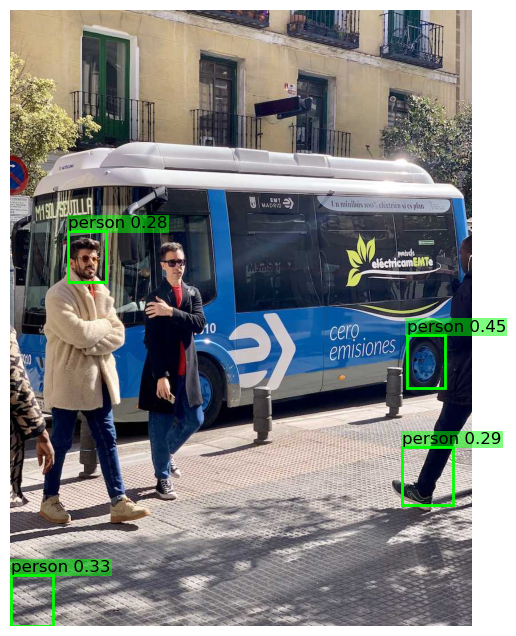

In [4]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import cv2

# Run YOLO prediction
model = YOLO('person_detector.pt')
results = model.predict(source='bus.jpg', save=False)

# Load the image (OpenCV loads in BGR, matplotlib expects RGB)
img = cv2.imread('bus.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Prepare the plot
fig, ax = plt.subplots(figsize=(10, 8))
ax.imshow(img)
ax.axis('off')

# Draw bounding boxes and labels
names = model.model.names  # class names

for box in results[0].boxes:
    x1, y1, x2, y2 = box.xyxy[0].tolist()
    conf = box.conf[0].item()
    cls = int(box.cls[0].item())
    label = f"{names[cls]} {conf:.2f}"
    # Draw rectangle
    rect = patches.Rectangle((x1, y1), x2 - x1, y2 - y1,
                             linewidth=2, edgecolor='lime', facecolor='none')
    ax.add_patch(rect)
    # Draw label background
    ax.text(x1, y1 - 5, label, color='black', fontsize=12,
            bbox=dict(facecolor='lime', alpha=0.5, edgecolor='none', pad=1))

plt.show()


image 1/1 /home/stimpy/projects/nidar_competition/Dataset/Dataset1/images/test/frame_000034.PNG: 384x640 18 persons, 6.2ms
Speed: 1.9ms preprocess, 6.2ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


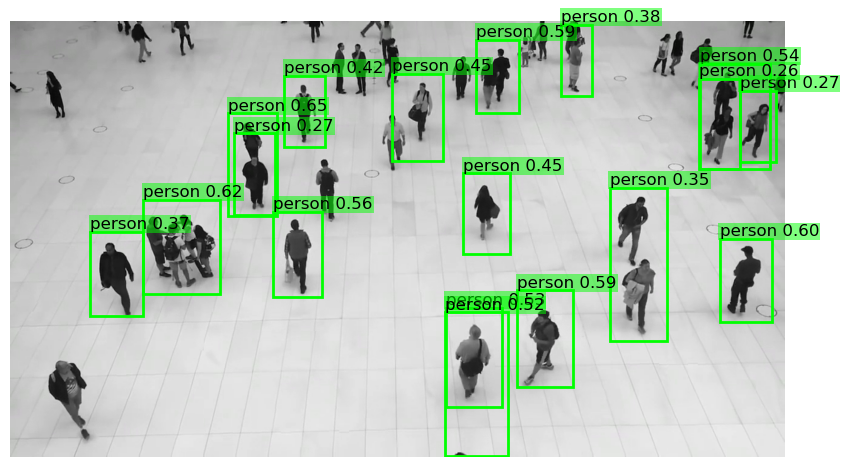

In [5]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import cv2

# Run YOLO prediction, only for 'person' class (class ID 0)
model = YOLO('person_detector.pt')
results = model.predict(
    source='Dataset/Dataset1/images/test/frame_000034.PNG',
    save=False,
    classes=[0]  # Only detect persons
)

# Load the image (OpenCV loads in BGR, matplotlib expects RGB)
img = cv2.imread('Dataset/Dataset1/images/test/frame_000034.PNG')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Prepare the plot
fig, ax = plt.subplots(figsize=(10, 8))
ax.imshow(img)
ax.axis('off')

# Draw bounding boxes and labels
names = model.model.names  # class names

for box in results[0].boxes:
    cls = int(box.cls[0].item())
    if cls != 0:  # Extra safety: skip if not 'person'
        continue
    x1, y1, x2, y2 = box.xyxy[0].tolist()
    conf = box.conf[0].item()
    label = f"{names[cls]} {conf:.2f}"
    # Draw rectangle
    rect = patches.Rectangle((x1, y1), x2 - x1, y2 - y1,
                             linewidth=2, edgecolor='lime', facecolor='none')
    ax.add_patch(rect)
    # Draw label background
    ax.text(x1, y1 - 5, label, color='black', fontsize=12,
            bbox=dict(facecolor='lime', alpha=0.5, edgecolor='none', pad=1))

plt.show()
